### Applying filters to denoise different types of noise in an image
Noise represents random variations of image intensity that couse image quality to deteriorate. We will discuss different types of noise with different distributions, such as:
* Gaussian
* Salt and Pepper
* Speckle
* Poisson and,
* Exponential

C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


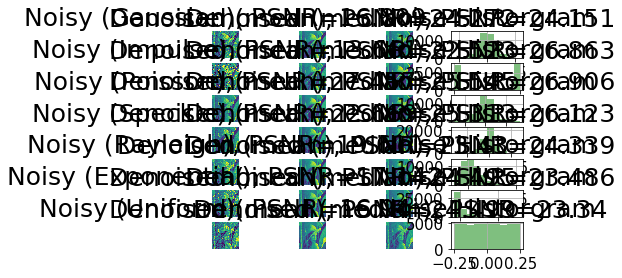

In [11]:
%matplotlib inline
from skimage.io import imread
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.measure import compare_psnr
from scipy.ndimage import uniform_filter, median_filter
import numpy as np
import matplotlib.pylab as plt

# 1. Define the plt_hist() function to plot the histogram of the noise added to the image:
def plt_hist(noise, bins=None):
    plt.grid()
    plt.hist(np.ravel(noise), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title('Noise Historgram', size=25)
    
# 2. Next, define the plt_images() function to plot all the images, that is, the
# original, noisy and denoised images, using the mean/median filters, and plot the
# noise histogram by calling the plt_hist() function defined previously. Also,
# compare the quality of the images denoised using the filters with the PSNR:
def plt_images(im, im_noisy, noise, noise_type, i):
    im_denoised_mean = uniform_filter(im_noisy, 5)
    im_denoised_median = median_filter(im_noisy, 5)
    plt.subplot(7,4,i), plt.imshow(im_noisy),plt.title('Noisy ({}), PSNR={}'.format(noise_type,np.round(compare_psnr(im, im_noisy),3)), size=25), \
    plt.axis('off')
    plt.subplot(7,4,i+1), plt.imshow(im_denoised_mean),plt.title('Denoised (mean), PSNR={}'.format(np.round(compare_psnr(im, im_denoised_mean),3)), size=25), \
    plt.axis('off')
    plt.subplot(7,4,i+2), plt.imshow(im_denoised_median),plt.title('Denoised (median), PSNR={}'.format(np.round\
    (compare_psnr(im, im_denoised_median),3)), size=25), plt.axis('off')
    plt.subplot(7,4,i+3), plt_hist(noise)
    
# 3. Load the original Lena RGB color image and convert it to a grayscale image:
im = rgb2gray(imread('images/lena.png'))

# 4. Now, add random noise to the original image by drawing samples from different
# distributions, along with appropriate parameters—one for each of the noise
# distributions. After this, call the plt_images() function defined earlier to plot
# the images and the noise distributions:

im1 = random_noise(im, 'gaussian', var=0.15**2)
plt_images(im, im1, im1-im, 'Gaussian', 1)

im1 = random_noise(im, 's&p', amount=0.15)
plt_images(im, im1, im1[((im1==0)|(im1==1))&((im!=0)&(im!=1))],'Impulse', 5)

noise = np.random.poisson(lam=int(np.mean(255*im)),size=im.shape)/255 - np.mean(im)
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Poisson', 9)

im1 = random_noise(im, 'speckle', var=0.15**2)
plt_images(im, im1, im1-im, 'Speckle', 13)
                          
noise = np.random.rayleigh(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Rayleigh', 17)
                          
noise = np.random.exponential(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Exponential', 21)
                          
noise = np.random.uniform(0, 0.5, size=im.shape) - 0.25
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Uniform', 25)

### Improving image contrast with histogramequalization

C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and 

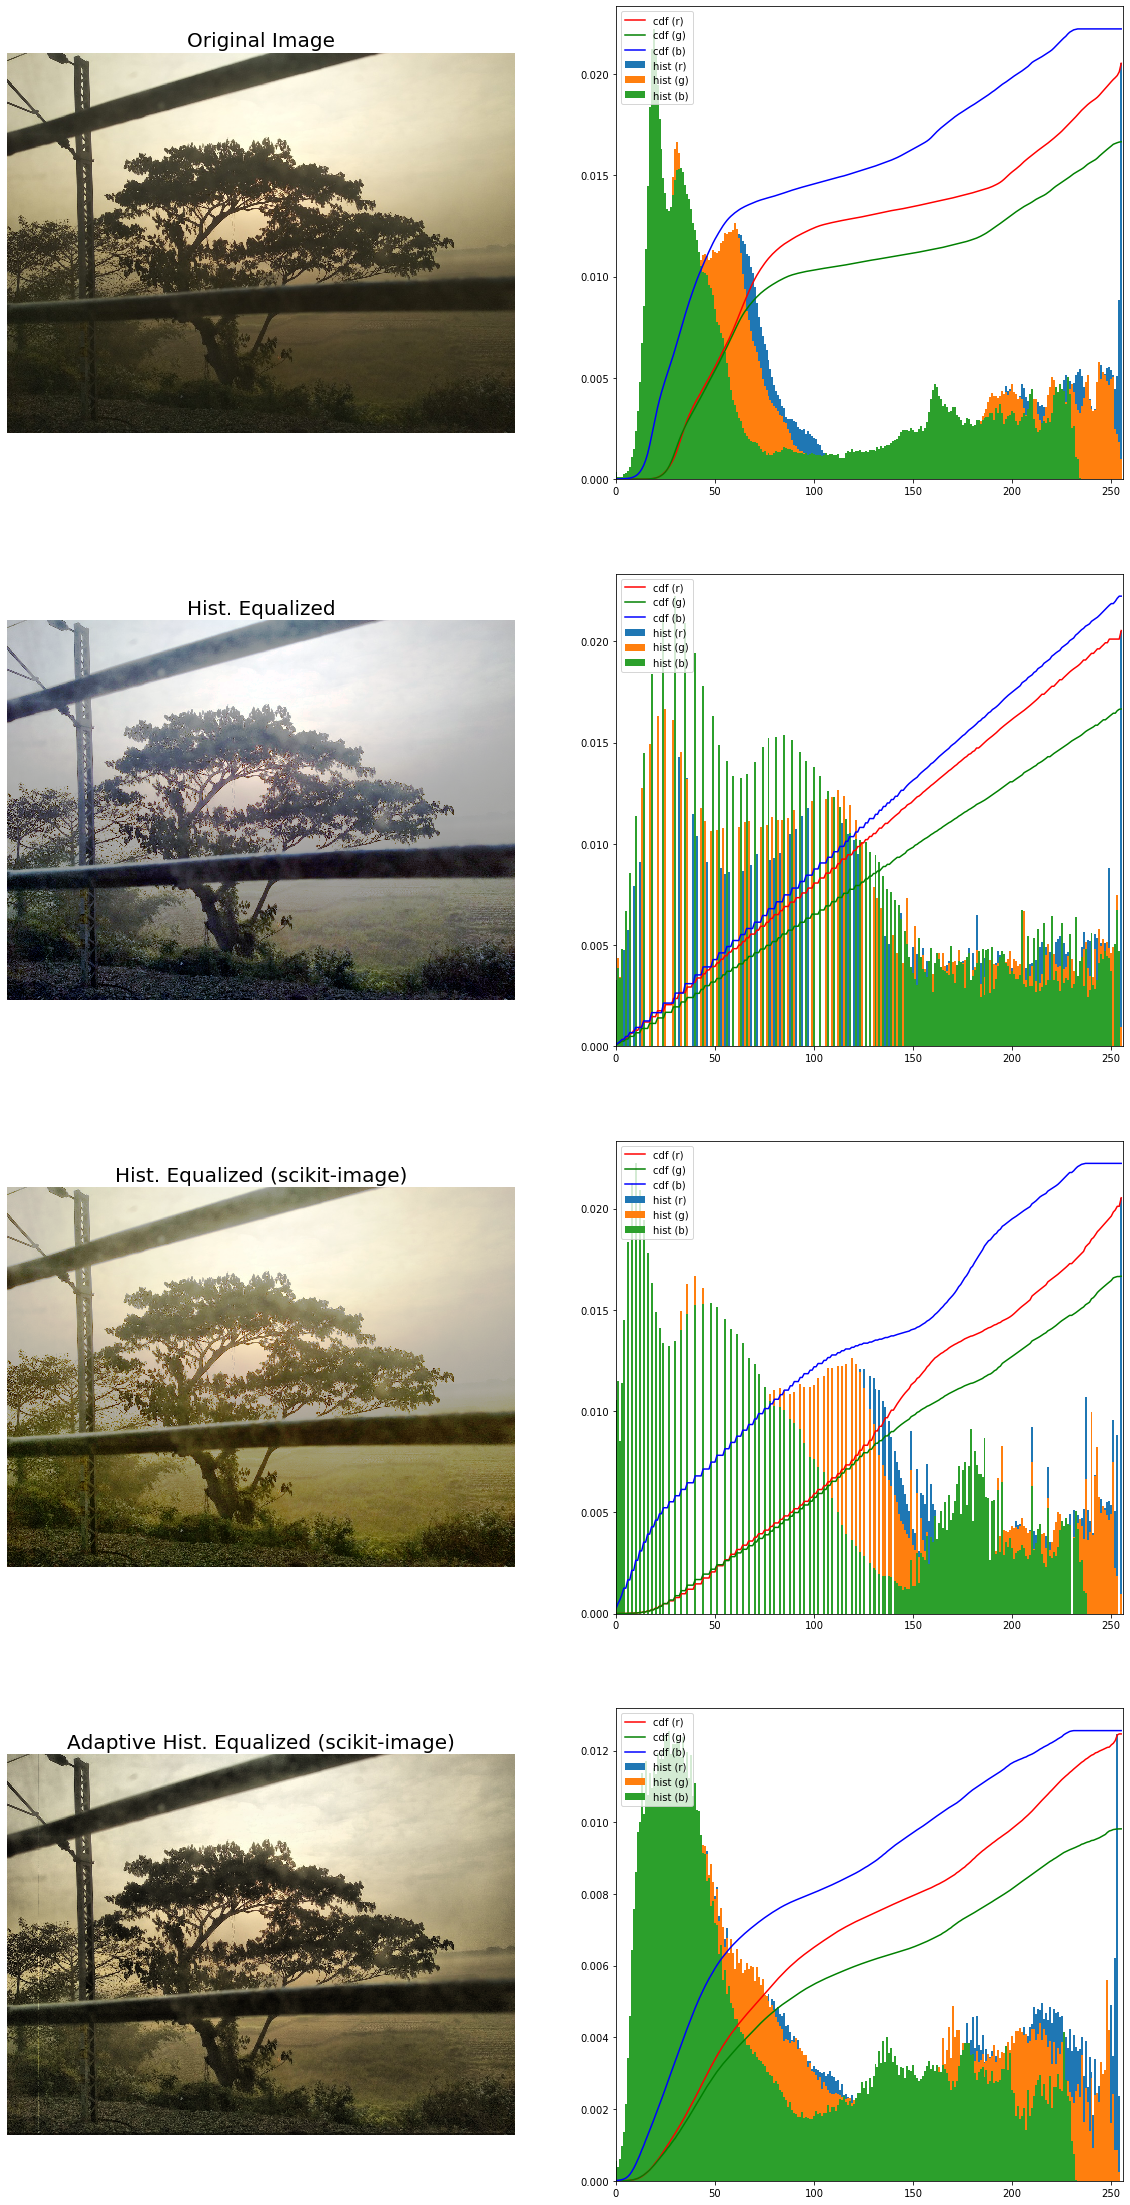

In [14]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.exposure import equalize_hist, equalize_adapthist

# 1. Define the plot_image() and plot_hist() functions to display an image and 
# return its cumulative distribution function (cdf), respectively:

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=20)
    plt.axis('off')
    
def plot_hist(img):
    colors = ['r', 'g', 'b']
    cdf = np.zeros((256,3))
    for i in range(3):
        hist, bins = np.histogram(img[...,i].flatten(),256,[0,256], normed=True)
        cdf[...,i] = hist.cumsum()
        cdf_normalized = cdf[...,i] * hist.max() / cdf.max()
        plt.plot(cdf_normalized, color = colors[i], label='cdf ({})'.format(colors[i]))
        #plt.hist(img[...,i].flatten(),256,[0,256], color = colors[i], density=True)
        binWidth = bins[1] - bins[0]
        plt.bar(bins[:-1], hist*binWidth, binWidth, label='hist ({})'.format(colors[i]))
        plt.xlim([0,256])
    plt.legend(loc = 'upper left')
    return cdf

img = imread('images/train.png')
#print(np.max(img))

plt.figure(figsize=(20,40))
#plt.gray()

plt.subplot(421), plot_image(img, 'Original Image')
plt.subplot(422) 
cdf = plot_hist(img)

# 2. Implement the histogram equalization by reassigning the pixel values with the
# corresponding cdf value for that pixel using the following code:
img2 = np.copy(img)
for i in range(3):
    cdf_m = np.ma.masked_equal(cdf[...,i],0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #cdf_m = 255 * cdf / cdf[-1] # normalize
    cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
    img2[...,i] = cdf2[img[...,i]]

plt.subplot(423), plot_image(img2, 'Hist. Equalized')
plt.subplot(424), plot_hist(img2)

# 3. Perform histogram equalization with the same input image using scikit-image
# library functions that implement global and adaptive histogram equalization:
equ = (255*equalize_hist(img)).astype(np.uint8)
plt.subplot(425), plot_image(equ, 'Hist. Equalized (scikit-image)')
plt.subplot(426), plot_hist(equ)


equ = (255*equalize_adapthist(img)).astype(np.uint8)
plt.subplot(427), plot_image(equ, 'Adaptive Hist. Equalized (scikit-image)')
plt.subplot(428), plot_hist(equ)

plt.savefig('images/hist_out.png', bbox_in='tight', pad_in=0)

plt.show()

### Implementing histogram matching
Histogram matching is an image processing task where an image is altered in such a way
that its histogram matches the histogram of another reference (template) image's histogram.
The algorithm is described as follows:
1. Compute the cumulative histogram for each image. 
2. For any given pixel value, `xi`, in the input image, find the corresponding pixel value,`xj`, in the output image by matching the input image's histogram with the template image's histogram `(G(xi)=H(xj)`, as shown in the following diagram.
3. Replace pixel `xi` in the input with `xj` as shown in the following diagram:

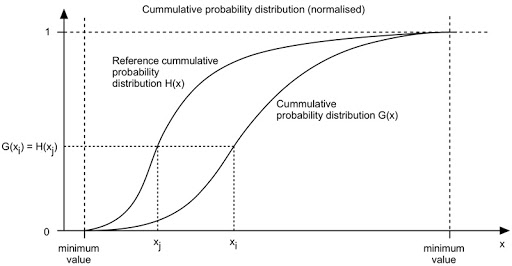

247 255


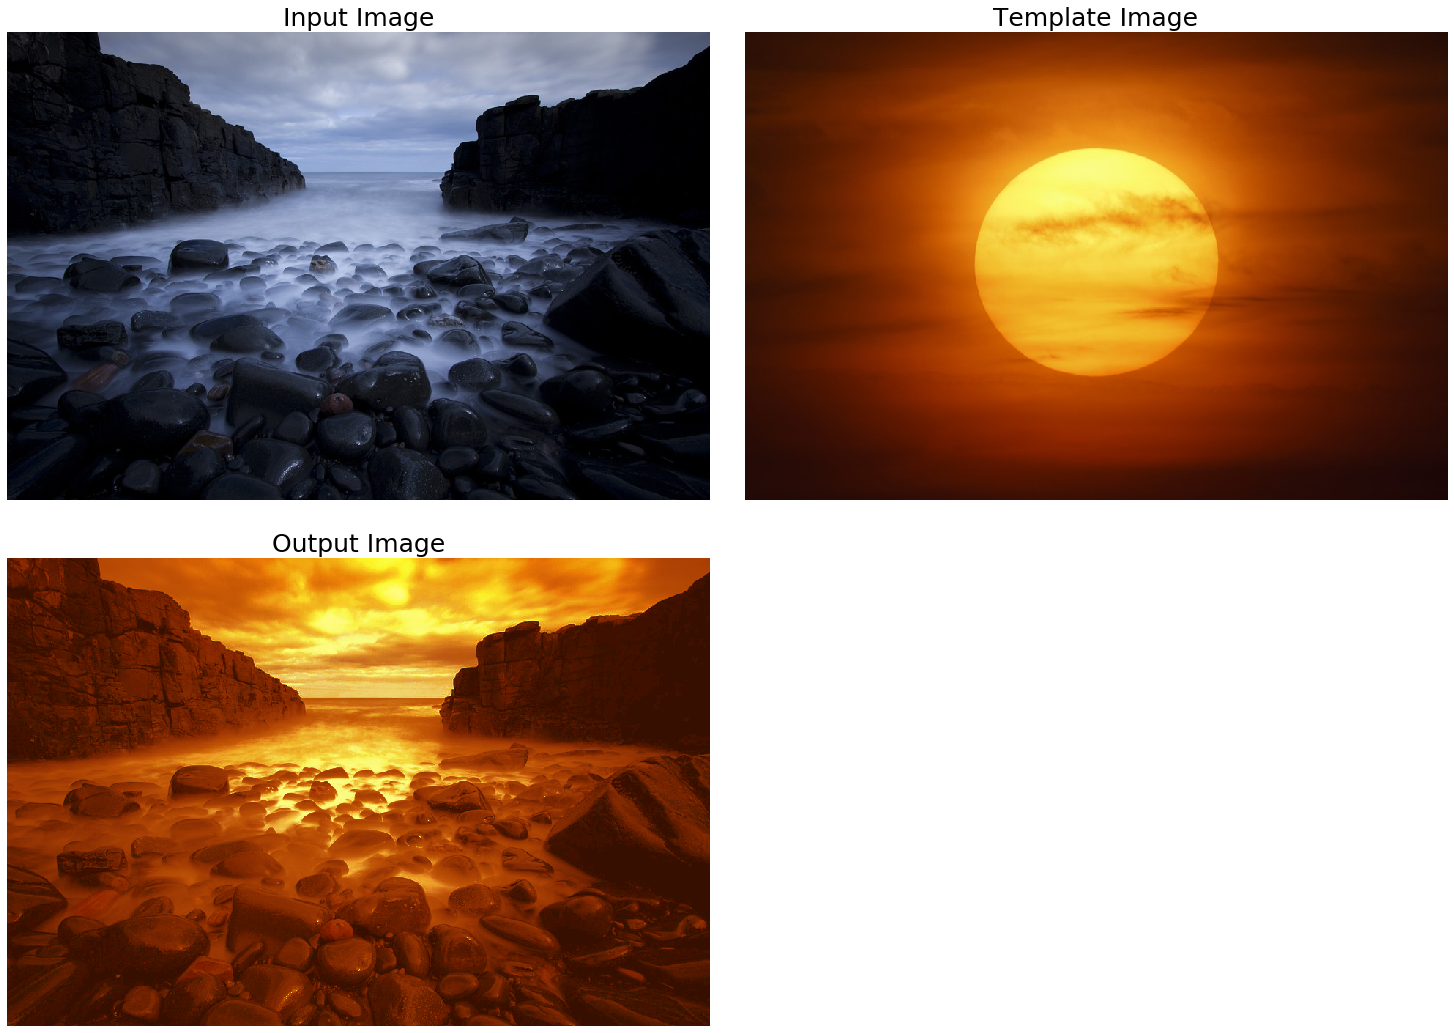

In [15]:
%matplotlib inline
from skimage.exposure import cumulative_distribution
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

# 1. Let's implement the histogram-matching algorithm with
# the hist_matching() function, which accepts the original and the template
# image's cdf along with the original image:

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))   # find closest matches to b_t
    pix_repl = {i:b[i] for i in range(256)} # dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

# 2. Compute cdf of an image with the following function:
def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

# 3. Finally, read the input and template images, compute their cdfs, and create the
# output image with the hist_matching() function. Plot the input, template, and
# output images by running the following code:

im = imread('images/rocks.png').astype(np.uint8)
im_t = imread('images/sun.png')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()